<a href="https://colab.research.google.com/github/spencerduberry/BankChurn_ML_Python/blob/main/Association/Association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-b4dc91059807>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_balances['balance_bin'] = pd.qcut(non_zero_balances['Balance'], q=10, labels=[f'Decile {i+1}' for i in range(10)])


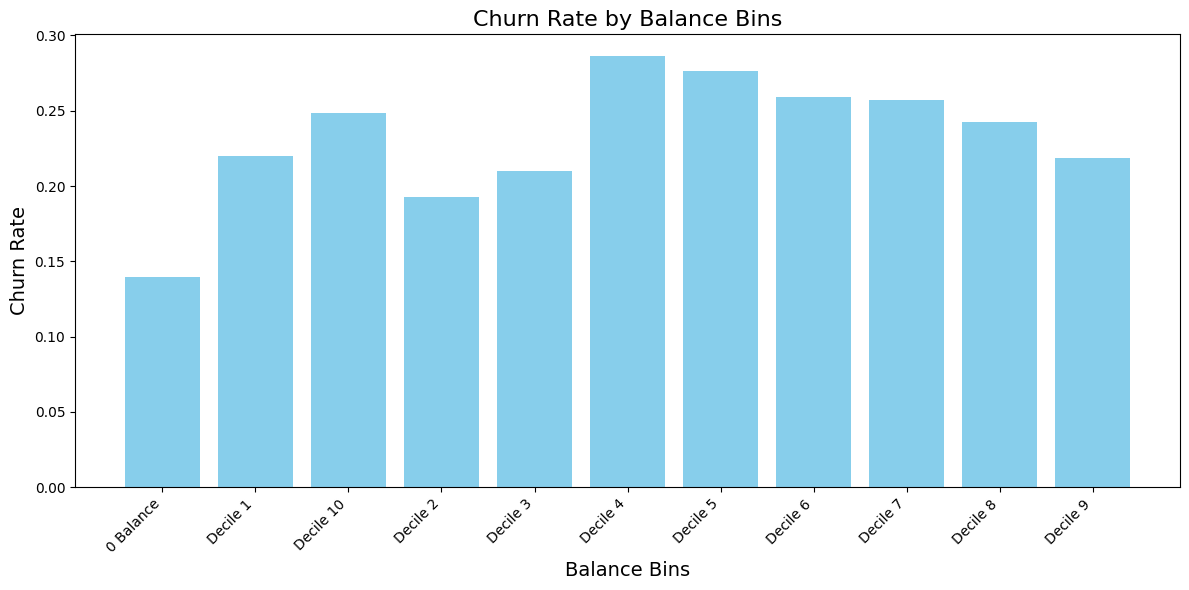

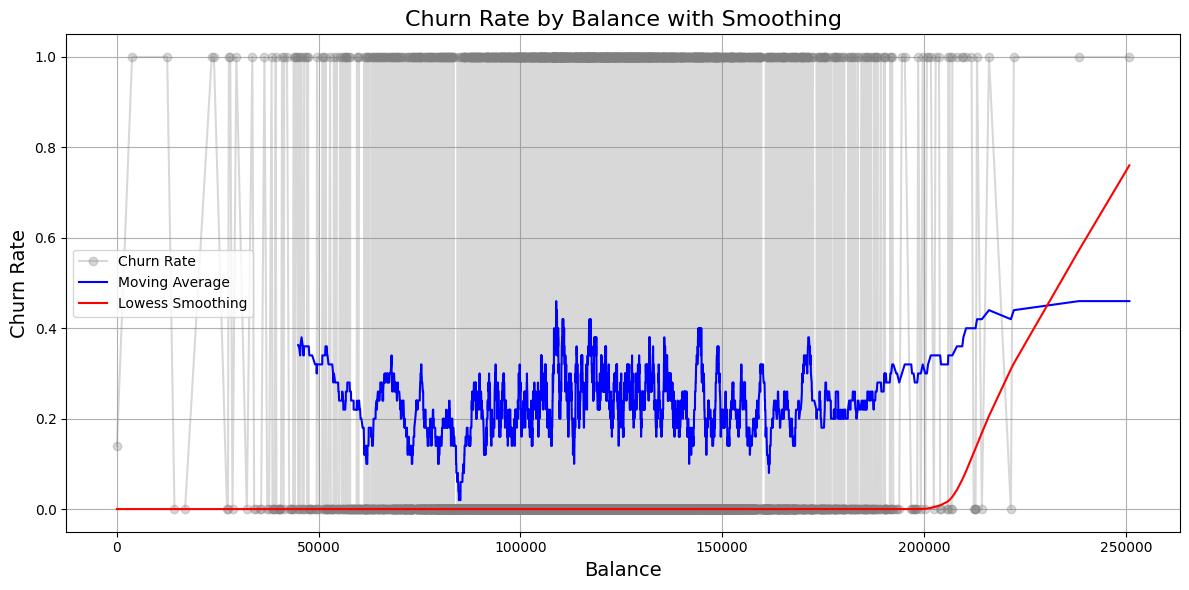

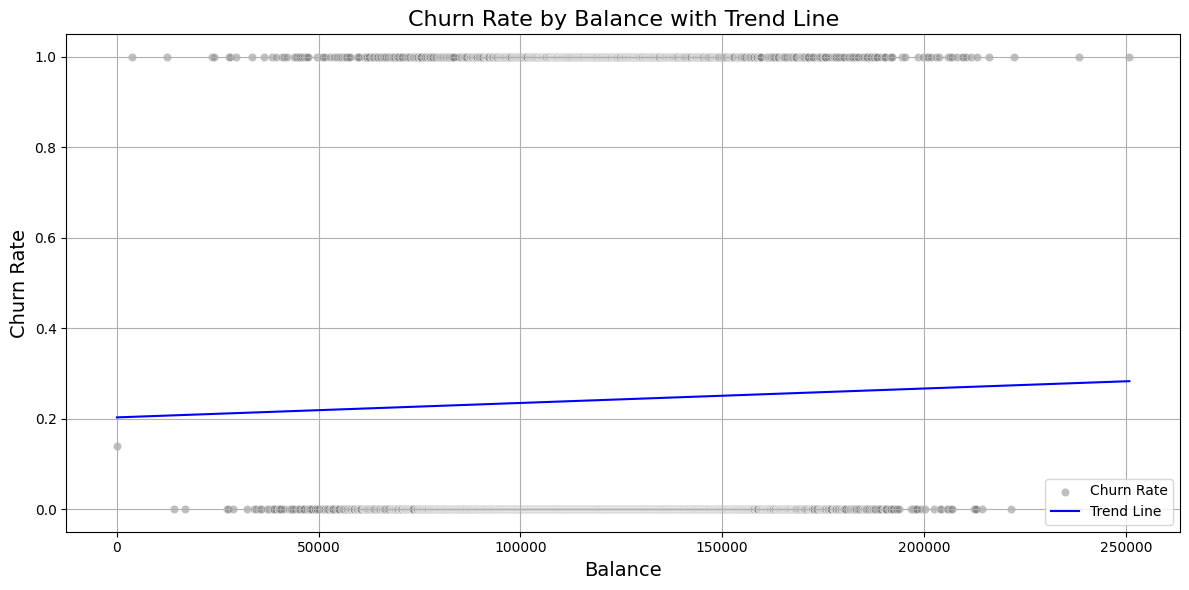

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Load the CSV file
file_path = 'Summative Data.csv'
data = pd.read_csv(file_path)

# Step 1: Create a new column 'balance_bin' and set initial values to NaN
data['balance_bin'] = pd.NA

# Step 2: Put all customers with a balance of 0 into their own bin
data.loc[data['Balance'] == 0, 'balance_bin'] = '0 Balance'

# Step 3: For customers with a balance > 0, calculate deciles
# Filter out the customers with 0 balance
non_zero_balances = data[data['Balance'] > 0]

# Assign deciles to non-zero balance customers
non_zero_balances['balance_bin'] = pd.qcut(non_zero_balances['Balance'], q=10, labels=[f'Decile {i+1}' for i in range(10)])

# Merge the decile information back into the original dataset
data.update(non_zero_balances)

# Step 4: Calculate the churn rate (mean of 'Exited') for each balance bin
churn_rates_bins = data.groupby('balance_bin')['Exited'].mean().reset_index()

# Rename 'Exited' column to 'churn_rate' for clarity
churn_rates_bins = churn_rates_bins.rename(columns={'Exited': 'churn_rate'})

# Step 5: Plot churn rates using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(churn_rates_bins['balance_bin'], churn_rates_bins['churn_rate'], color='skyblue')

# Customize the bar plot
plt.title('Churn Rate by Balance Bins', fontsize=16)
plt.xlabel('Balance Bins', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the bar plot
plt.tight_layout()
plt.show()

# Step 6: Calculate the churn rate for each unique balance for the line graph
churn_rates_continuous = data.groupby('Balance')['Exited'].mean().reset_index()

# Step 7: Calculate the moving average
window_size = 50  # Adjust this value as needed
churn_rates_continuous['Moving_Average'] = churn_rates_continuous['Exited'].rolling(window=window_size).mean()

# Step 8: Fit a Lowess smoother
lowess = sm.nonparametric.lowess
churn_rates_continuous['Lowess'] = lowess(churn_rates_continuous['Exited'], churn_rates_continuous['Balance'], frac=0.1)[:, 1]

# Step 9: Plot churn rates with moving average and lowess smoother
plt.figure(figsize=(12, 6))
plt.plot(churn_rates_continuous['Balance'], churn_rates_continuous['Exited'], marker='o', alpha=0.3, label='Churn Rate', color='gray')
plt.plot(churn_rates_continuous['Balance'], churn_rates_continuous['Moving_Average'], color='blue', label='Moving Average')
plt.plot(churn_rates_continuous['Balance'], churn_rates_continuous['Lowess'], color='red', label='Lowess Smoothing')

# Customize the line plot
plt.title('Churn Rate by Balance with Smoothing', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.legend()
plt.grid(True)  # Add grid for better readability

# Display the line plot
plt.tight_layout()
plt.show()

# Step 10: Scatter plot with trend line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=churn_rates_continuous, x='Balance', y='Exited', color='gray', alpha=0.5, label='Churn Rate')

# Fit a linear regression line
slope, intercept = np.polyfit(churn_rates_continuous['Balance'], churn_rates_continuous['Exited'], 1)
plt.plot(churn_rates_continuous['Balance'], slope * churn_rates_continuous['Balance'] + intercept, color='blue', label='Trend Line')

# Customize the scatter plot
plt.title('Churn Rate by Balance with Trend Line', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.legend()
plt.grid(True)  # Add grid for better readability

# Display the scatter plot with trend line
plt.tight_layout()
plt.show()



